# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by: 
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the fraction of heads seen in $n$ coin tosses is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $\lim_{n\rightarrow \infty} M_{n} = p$. For $M_n$ being in the range $(x,y)$, we have: 
$$ Prob(x<M_n<y) = \sum_{r \in \mathcal Z~\wedge~x<\frac{r}{n}<y} P(r;n) $$



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

Text(0, 0.5, 'log P(M_n = x)')

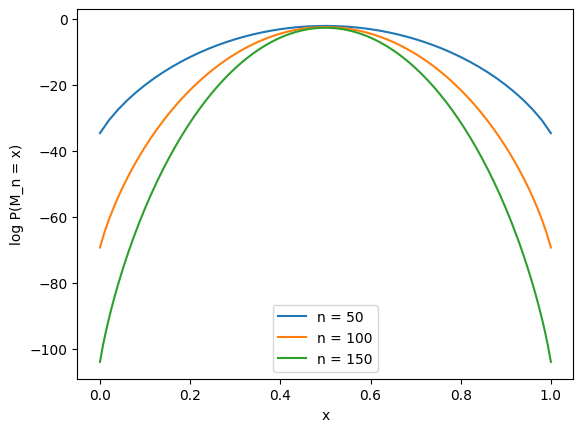

In [1]:
import scipy.special
import math
import numpy
import matplotlib.pyplot as plt

p = 0.5
q = 1 - p

def prob(n, x):
    return scipy.special.binom(n, x) * math.pow(p, x) * math.pow(q, n - x)
    
for n in (50, 100, 150):
    x = numpy.linspace(0, 1, n + 1)
    p_x = [math.log(prob(n, i)) for i in range(n + 1)]
    plt.plot(x, p_x, label = f"{n = }")

plt.legend()
plt.xlabel("x")
plt.ylabel("log P(M_n = x)")

Text(0, 0.5, 'log P(M_n = x)')

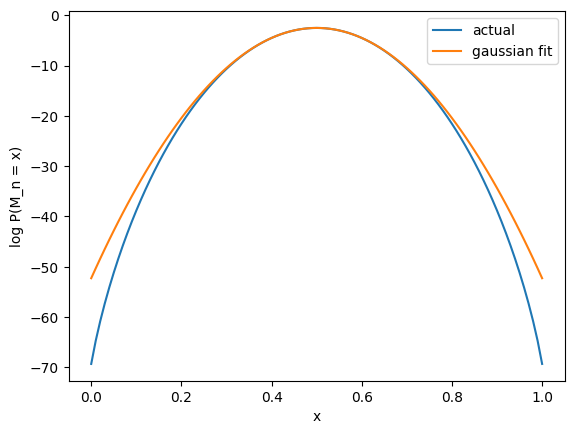

In [2]:
import scipy.optimize


def gaussian(x, amplitude, mean, stddev):
    return amplitude * numpy.exp(-(((x - mean) / 4 / stddev) ** 2))


n = 100

x = numpy.linspace(0, 1, n + 1)
p_x = numpy.array([prob(n, i) for i in range(n + 1)])

params = scipy.optimize.curve_fit(gaussian, x, p_x, p0=[0.1, 1, 1])[0]

plt.plot(x, list(map(math.log, p_x)), label="actual")
plt.plot(x, list(map(math.log, gaussian(x, *params))), label="gaussian fit")

plt.legend()
plt.xlabel("x")
plt.ylabel("log P(M_n = x)")


In this plot we can see the two curves (actual curve, and gaussian curve) coincide in the region around $x = 1/2$.
Therefore the actual curve is gaussian around $x = 1/2$.

## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$

Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

Text(0, 0.5, 'log Prob(M_n > x)')

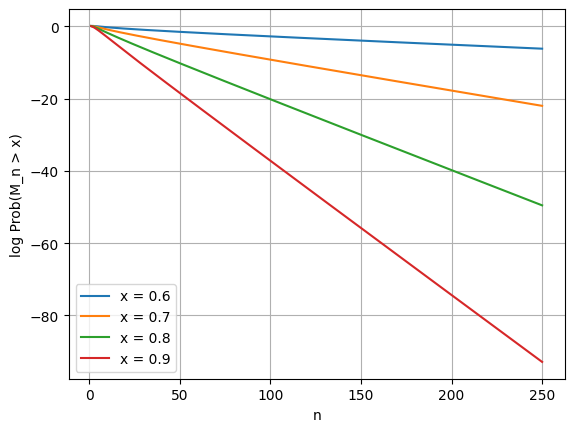

In [3]:

ns = numpy.arange(1, 251)

for x in [0.6, 0.7, 0.8, 0.9]:
    p_n = [math.log(sum(prob(n, n * i) for i in numpy.linspace(x, 1, n + 1))) for n in ns]
    plt.plot(ns, p_n, label = f"{x = }")

plt.legend()
plt.grid()
plt.xlabel("n")
plt.ylabel("log Prob(M_n > x)")


We observe that the curves are almost linear, with the slope getting more and more negative as x increases.

## Task-3: 
Note that for large $N$, the above plots are linear. 
Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

Text(0, 0.5, 'I(x)')

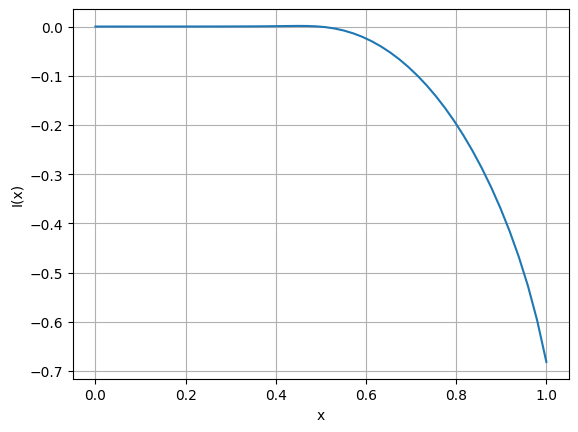

In [4]:
from scipy.stats import linregress

ns = numpy.arange(1, 251)
xvals = numpy.linspace(0, 1, 50)

# This can take a couple of seconds to run
yvals = [
    linregress(
        ns,
        [
            math.log(sum(prob(n, n * i) for i in numpy.linspace(x, 1, n + 1)))
            for n in ns
        ],
    ).slope
    for x in xvals
]

plt.plot(xvals, yvals)
plt.grid()
plt.xlabel("x")
plt.ylabel("I(x)")

We notice that the slope is almost 0 upto $x = 0.5$, and after that there is a sharp decrease in slope.

## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by 
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$ 
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

Plot a one realisation of $x(t)$ for $t\in[0,100]$


Text(0, 0.5, 'x(t)')

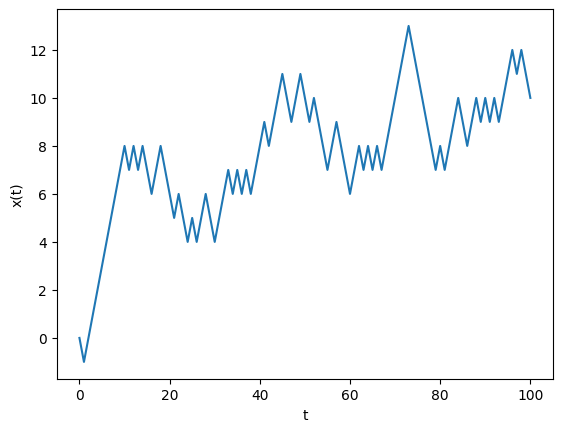

In [5]:
import random

def get_random_walk(walk_size = 100):
    x = [0]
    for _ in range(walk_size):
        x.append(x[-1] + random.choice([-1, 1]))
    
    return x

plt.plot(get_random_walk())
plt.xlabel("t")
plt.ylabel("x(t)")

## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$? 
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

##### Answers

1. $\langle x(t) \rangle$ would be close to 0. For an unbiased coin, as heads is equally probable as tails, at each point on the walk, taking a step of 1 unit is as likely as a -1 step.
2. $\langle x^2(t) \rangle$ would be t, approximately. Because <br>
$\langle x^2(t + 1) \rangle = \langle (x(t) + a(t))^2 \rangle$ (where a(t) $\in$ {1, -1} with equal probability)<br>
$ = \langle x^2(t) + a^2(t) + 2x(t)a(t) \rangle$ <br>
$ = \langle x^2(t) \rangle + \langle a^2(t) \rangle + \langle 2x(t)a(t) \rangle $ <br>
Clearly $ \langle a^2(t) \rangle = 1 $ and $ \langle 2x(t)a(t) \rangle = 0 $ <br>
$ = \langle x^2(t) \rangle + 1 $ <br>
And because $\langle x^2(0) \rangle = 0$, it follows $\langle x^2(t) \rangle = t$

3. Obviously, there are errors in the plot of $\langle x^2(t) \rangle$ due to the randomness. For a small sample of random walks this error can be large. The error can be minimized further and further by taking larger and larger sample sizes (increasing `NUM_WALKS` in the code)

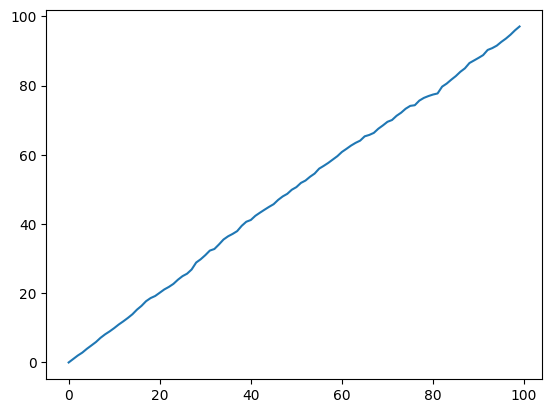

In [6]:
import statistics

NUM_WALKS = 2000
walks = [get_random_walk() for _ in range(NUM_WALKS)]
data = [statistics.mean(walk[j] ** 2 for walk in walks) for j in range(100)]
plt.plot(data)

We see an almost linear plot, as predicted by calculations above.

## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail, where once the 'drunk' random walker reaches, is trapped for ever. 

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$. 

Compute $y_M(t)$ by generating a sample of random walks. Comment.

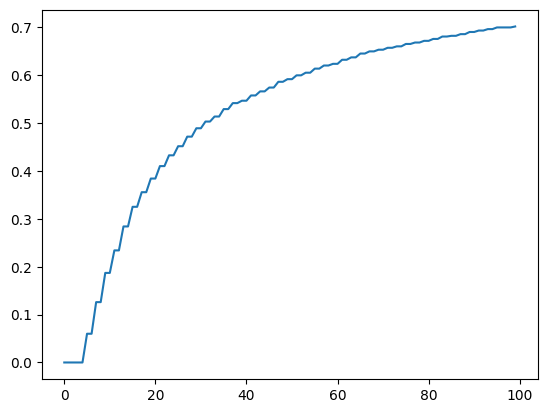

In [7]:
NUM_WALKS = 2000
walks = [get_random_walk() for _ in range(NUM_WALKS)]

M = 4

plt.plot([statistics.mean(int(M in walk[:t]) for walk in walks) for t in range(100)])

This curve resembles a logarithmic plot. We also notice a step-like pattern, and that the curve is 0 for an initial range of values (upto `M`)

## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem

In task 2 we observe straight lines when $\log P(M_n > x)$ is plotted. This verifies the fact that $P(M_n > x)$ is some exponential function of $n$, as its mathematical expression indicates.

In task 6 we observe that the curve itself resembles a logarithmic function.

To find the PDF of position of the random walker with a trap at distance $+M$, we need to apply the Cramer's theorem.

Cramer's theorem can be used to estimate the probability of the random walk reaching extreme values over a large number of steps. It states that if $X_1, X_2, ..., X_n$ are random variables representing the steps of the random walk, then (for a large n)

$$P(max(X_1 + X_2 + ... + X_n) ≥ a) ≈ e^{-nI(a)} $$

where a is the threshold, and I(a) is the Cramer's rate function, which is defined as is defined as:

$$ I(a) = sup{λa - log[M(λ)]} $$

Here $λ$ is a real number, and $M(λ)$ is the moment generating function.
